In [1]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

In [2]:
print(tf.test.gpu_device_name())

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
data_set = keras.datasets.cifar10

(X_train_full, y_train_full),(X_test,y_test) = data_set.load_data()

In [4]:
X_train_full.shape

(50000, 32, 32, 3)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)


(45000, 32, 32, 3)
(45000, 1)
(5000, 32, 32, 3)
(5000, 1)


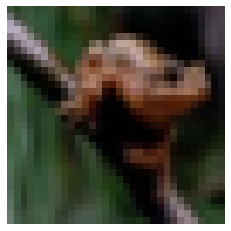

In [8]:
plt.imshow(X_train[0])
plt.axis('off')
plt.show()

In [9]:
print(y_train.shape)


y_train = y_train.flatten()
y_train.squeeze()
y_train

(45000, 1)


array([6, 7, 9, ..., 9, 1, 1], dtype=uint8)

In [10]:
y_valid = y_valid.flatten()
y_valid.squeeze()
y_valid.shape


(5000,)

In [11]:
X_train.shape

(45000, 32, 32, 3)

In [12]:
y_train = y_train.flatten()

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)


(45000, 32, 32, 3)
(45000,)
(5000, 32, 32, 3)
(5000,)


In [14]:
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

In [15]:
class_names[y_train[0]]

'frog'

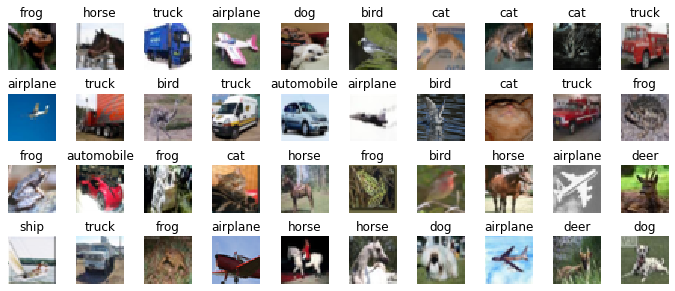

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [17]:
# X_train=np.array(X_train)
# X_test=np.array(X_test)
# X_valid=np.array(X_valid)
# X_train = X_train.reshape(X_train.shape[0],32, 32, 3)
# X_test = X_test.reshape(X_test.shape[0],32, 32, 3)
# X_valid = X_valid.reshape(X_valid.shape[0],32, 32, 3)
# X_train.shape

In [18]:
# nClasses =10
# # Use Keras' handy utils
# # utils.to_categorical:-Converts a class vector (integers) to binary class matrix.
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=nClasses)
# y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=(nClasses))

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(300, activation="relu", name="hidden_layer1"),
    keras.layers.Dense(100, activation="relu", name="hidden_layer2"),
    keras.layers.Dense(10, activation="softmax", name="output_layer")
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 hidden_layer1 (Dense)       (None, 300)               921900    
                                                                 
 hidden_layer2 (Dense)       (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


In [21]:
# keras.utils.plot_model(model, "animals.png", show_shapes=True)

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)


(45000, 32, 32, 3)
(45000,)
(5000, 32, 32, 3)
(5000,)


In [24]:
history = model.fit(X_train, y_train, epochs=50, shuffle=True, batch_size=16,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
2813/2813 [==============================] - 19s 6ms/step - loss: 1.8608 - accuracy: 0.3285 - val_loss: 1.7139 - val_accuracy: 0.3806
Epoch 2/50
2813/2813 [==============================] - 18s 7ms/step - loss: 1.6757 - accuracy: 0.4017 - val_loss: 1.7164 - val_accuracy: 0.3752
Epoch 3/50
2813/2813 [==============================] - 21s 7ms/step - loss: 1.5947 - accuracy: 0.4338 - val_loss: 1.6632 - val_accuracy: 0.3930
Epoch 4/50
2813/2813 [==============================] - 16s 6ms/step - loss: 1.5363 - accuracy: 0.4512 - val_loss: 1.6007 - val_accuracy: 0.4314
Epoch 5/50
2813/2813 [==============================] - 18s 6ms/step - loss: 1.4932 - accuracy: 0.4680 - val_loss: 1.5269 - val_accuracy: 0.4560
Epoch 6/50
2813/2813 [==============================] - 18s 6ms/step - loss: 1.4550 - accuracy: 0.4810 - val_loss: 1.5238 - val_accuracy: 0.4614
Epoch 7/50
2813/2813 [==============================] - 18s 6ms/step - loss: 1.4155 - accuracy: 0.4942 - val_loss: 1.5211 - val_ac

KeyboardInterrupt: 

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
model.evaluate(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

y_predict_prob = model.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)
conf_mx = confusion_matrix(y_test, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(y_test,y_predict)
save_fig("model_confusion_matrix_errors", tight_layout=False)
plt.show()
print(classification_report(y_test, y_predict, target_names=['0','1','2','3','4','5','6','7','8','9'] ))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_predict_prob_val= model.predict(X_valid)
y_predict_val= y_predict_prob_val.argmax(axis=-1)
conf_mx_val= confusion_matrix(y_valid, y_predict_val)

plot_confusion_matrix(y_valid, y_predict_val)
save_fig("model_confusion_matrix_errors", tight_layout=False)
plt.show()
print(classification_report(y_val, y_predict_val, target_names=['0','1','2','3','4','5','6','7','8','9'] ))


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_predict_prob_train = model.predict(x_train)
y_predict_train= y_predict_prob_train.argmax(axis=-1)
conf_mx_train = confusion_matrix(y_train, y_predict_train)

plot_confusion_matrix(y_train, y_predict_train)
save_fig("model_confusion_matrix_errors", tight_layout=False)
plt.show()
print(classification_report(y_train, y_predict_train, target_names=['0','1','2','3','4','5','6','7','8','9'] ))